In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from NNetwork import NNetwork as nn
from src.sampling.Sampling import sampling_SNLD
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_reg
from util.plotting import *
import os
import sys
from contextlib import contextmanager

In [24]:
@contextmanager
def suppress_output():
    # Redirect stdout to null
    with open(os.devnull, 'w') as fnull:
        original_stdout = sys.stdout
        sys.stdout = fnull
        try:
            yield
        finally:
            sys.stdout = original_stdout

In [25]:
def compute_latent_motifs(graph_list, sample_size_list, k, n_components, iterations):
    motifs = {}
    for i in range(len(graph_list)):
        for j in range(len(graph_list)):
            if i != j:
                print(f"Computing latent motifs for networks ({i}, {j})")
                X, y = sampling_SNLD([graph_list[i], graph_list[j]], k=k, sample_size_list=sample_size_list)
                with suppress_output():
                    W, beta, H = sndl_equalEdge([graph_list[i], graph_list[j]], sample_size_1=sample_size_list[0], sample_size_2=sample_size_list[1], k=k, xi=2, n_components=n_components, iter=iterations)
                motifs[(i, j)] = (W, beta)
    return motifs

In [26]:
def compute_affinity_scores(motifs, graph_paths, sample_size_list, k, n_components, iterations):
    affinity_scores = {}
    num_graphs = len(graph_paths)
    
    for (i, j), (W, beta) in motifs.items():
        for l in range(num_graphs):
            print(f"Computing affinity score for pair ({i}, {j}) with test network {l}")
            G_test = nn.NNetwork()
            G_test.load_add_edges(graph_paths[l], increment_weights=False, use_genfromtxt=True)
            affinity_score = sndl_reg(G_test, W, beta, 1000)
            affinity_scores[(i, j, l)] = affinity_score
            del G_test  # Clear memory after usage
    return affinity_scores

In [27]:
def plot_affinity_heatmap(affinity_scores, ntwk_list):
    num_graphs = len(ntwk_list)
    affinity_matrix = np.zeros((num_graphs * (num_graphs - 1), num_graphs))
    
    row_labels = []
    idx = 0
    
    for i in range(num_graphs):
        for j in range(num_graphs):
            if i != j:
                row_labels.append(f'{ntwk_list[i]} & {ntwk_list[j]}')
                for l in range(num_graphs):
                    affinity_matrix[idx, l] = affinity_scores[(i, j, l)]
                idx += 1

    col_labels = [ntwk for ntwk in ntwk_list]

    plt.figure(figsize=(10, 8))
    sns.heatmap(affinity_matrix, annot=True, fmt=".2f", xticklabels=col_labels, yticklabels=row_labels, cmap='Blues')
    plt.xlabel('Test Network')
    plt.ylabel('Network Pair')
    plt.title('Affinity Scores Heatmap')
    plt.show()

In [28]:
def affinity_analysis(ntwk_list, sample_size_list, k, n_components, iterations):
    graph_paths = [f"data/{ntwk}.txt" for ntwk in ntwk_list]
    graph_list = []

    for path in graph_paths:
        G = nn.NNetwork()
        G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
        graph_list.append(G)
    
    motifs = compute_latent_motifs(graph_list, sample_size_list, k, n_components, iterations)
    affinity_scores = compute_affinity_scores(motifs, graph_paths, sample_size_list, k, n_components, iterations)
    plot_affinity_heatmap(affinity_scores, ntwk_list)

Computing latent motifs for networks (0, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:30<00:00,  8.31it/s]


Computing latent motifs for networks (0, 2)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:57<00:00,  4.36it/s]


Computing latent motifs for networks (0, 3)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:31<00:00,  7.96it/s]


Computing latent motifs for networks (1, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:29<00:00,  8.38it/s]


Computing latent motifs for networks (1, 2)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:28<00:00,  8.69it/s]


Computing latent motifs for networks (1, 3)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:30<00:00,  8.18it/s]


Computing latent motifs for networks (2, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:31<00:00,  7.83it/s]


Computing latent motifs for networks (2, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:29<00:00,  8.39it/s]


Computing latent motifs for networks (2, 3)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:31<00:00,  7.96it/s]


Computing latent motifs for networks (3, 0)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:31<00:00,  8.03it/s]


Computing latent motifs for networks (3, 1)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:30<00:00,  8.24it/s]


Computing latent motifs for networks (3, 2)
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500


100%|██████████| 250/250 [00:33<00:00,  7.39it/s]


Computing affinity score for pair (0, 1) with test network 0
Computing affinity score for pair (0, 1) with test network 1
Computing affinity score for pair (0, 1) with test network 2
Computing affinity score for pair (0, 1) with test network 3
Computing affinity score for pair (0, 2) with test network 0
Computing affinity score for pair (0, 2) with test network 1
Computing affinity score for pair (0, 2) with test network 2
Computing affinity score for pair (0, 2) with test network 3
Computing affinity score for pair (0, 3) with test network 0
Computing affinity score for pair (0, 3) with test network 1
Computing affinity score for pair (0, 3) with test network 2
Computing affinity score for pair (0, 3) with test network 3
Computing affinity score for pair (1, 0) with test network 0
Computing affinity score for pair (1, 0) with test network 1
Computing affinity score for pair (1, 0) with test network 2
Computing affinity score for pair (1, 0) with test network 3
Computing affinity score

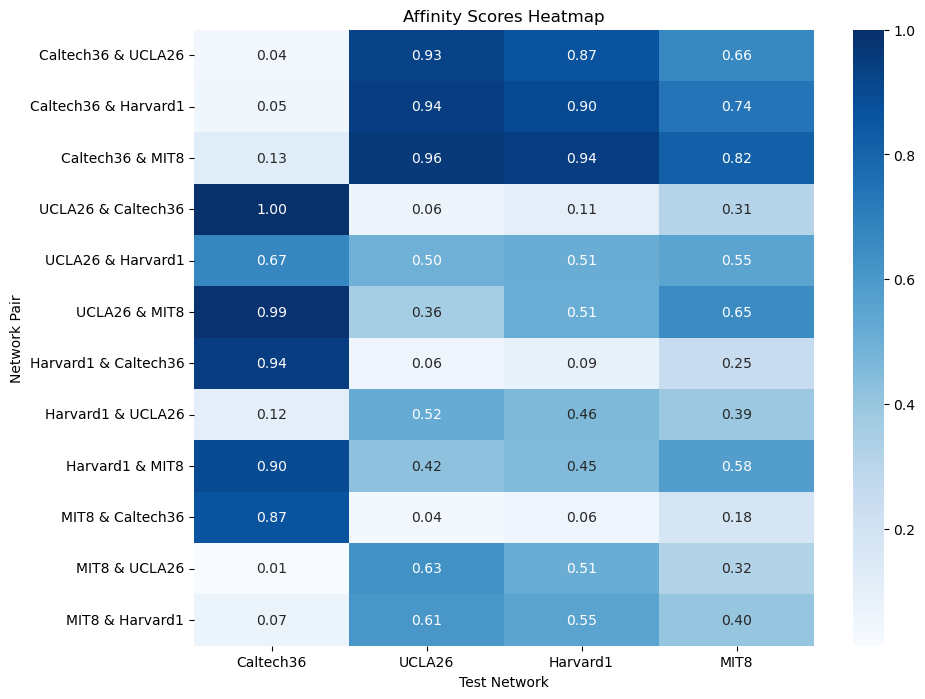

In [29]:
# Example usage
ntwk_list = ['Caltech36', 'UCLA26', 'Harvard1', "MIT8"]
sample_size_list = [500, 500]
k = 25
n_components = 16
iterations = 250

affinity_analysis(ntwk_list, sample_size_list, k, n_components, iterations)